In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
import pandas as pd
import plotly.express as px
import plotly.io as pio

# notebook renderer wasn't working for me. unfortunately pngs aren't interactive
pio.renderers.default = 'png'

from data import *
from plotting import *
from regression import *
from utils import *

In [3]:
results_dir = 'results/updated-schema/'
os.makedirs(results_dir, exist_ok=True)

In [4]:
# Load data
pcd_df = load_pcd_df()

In [5]:
pcd_df

,System,Domain,Task,Publication date,Accessibility notes,Model accessibility,Dataset accessibility,Code accessibility,Link,Organization,...,Organization categorization,Foundation model,Training compute lower bound,Training compute upper bound,Training chip-hours,Organization categorization (from Organization),Possibly over 1e23 FLOP,Training compute cost (2023 USD),Training dataset size,Sparsity
0,Gemini 1.0 Ultra,"Multimodal,Language,Vision","Language modelling,Visual question answering,C...",2023-12-06,NaN,Hosted access (no API),NaN,Unreleased,https://storage.googleapis.com/deepmind-media/...,Google DeepMind,...,Industry,NaN,NaN,NaN,132000000.0,Industry,NaN,$29827341.92,Gemini 1.0 Ultra,NaN
1,GPT-4,"Multimodal,Language,Vision,Image generation",Language modelling,2023-03-15,NaN,API access,NaN,Unreleased,https://arxiv.org/abs/2303.08774,OpenAI,...,Industry,checked,NaN,NaN,57000000.0,Industry,NaN,$40586592.58,GPT-4,GPT-4
2,Mistral Large,Language,Chat,2024-02-26,NaN,API access,NaN,Unreleased,https://mistral.ai/news/mistral-large/,Mistral AI,...,Industry,NaN,NaN,NaN,NaN,Industry,NaN,NaN,Mistral Large,NaN
3,Nemotron-4 340B,Language,"Language modelling/generation,Chat",2024-06-14,Permissive commercial license: https://develop...,Open source,NaN,NaN,https://blogs.nvidia.com/blog/nemotron-4-synth...,NVIDIA,...,Industry,NaN,NaN,NaN,NaN,Industry,NaN,NaN,Nemotron-4 340B,NaN
4,MegaScale (Production),Language,Language modelling/generation,2024-02-23,Code for MegaScale (also called veScale) train...,Unreleased,NaN,Unreleased,https://arxiv.org/abs/2402.15627,"ByteDance,Peking University",...,"Industry,Academia",NaN,NaN,NaN,NaN,"Industry,Academia",NaN,NaN,MegaScale (Production),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,Audioseal,"Audio,Speech","Audio classification,Audio generation",2024-06-06,The code in this repository is released under ...,NaN,NaN,Open source,https://arxiv.org/abs/2401.17264,Facebook AI Research,...,Industry,NaN,NaN,NaN,NaN,Industry,NaN,NaN,NaN,NaN
1591,GLM-4 (0520),Language,"Language modelling/generation,Question answeri...",2024-06-18,the GLM-4 API at\nhttps://bigmodel.cn,API access,NaN,NaN,https://arxiv.org/abs/2406.12793,Zhipu AI,...,Industry,NaN,NaN,NaN,NaN,Industry,checked,NaN,GLM-4,NaN
1592,GLM-4 All Tools,"Language,Multimodal,Image generation","Language modelling/generation,Question answeri...",2024-01-17,GLM-4 All Tools is accessible via the website ...,Hosted access (no API),NaN,NaN,https://arxiv.org/abs/2406.12793,Zhipu AI,...,Industry,NaN,NaN,NaN,NaN,Industry,checked,NaN,GLM-4,NaN
1593,Multilingual DNN,Speech,Speech recognition,2013-05-26,NaN,NaN,NaN,NaN,https://www.semanticscholar.org/paper/Multilin...,Google,...,Industry,NaN,NaN,NaN,NaN,Industry,NaN,NaN,NaN,NaN


In [6]:
pcd_df.loc[pcd_df['System'] == 'Megatron-BERT']['Model accessibility']

139    Unreleased
Name: Model accessibility, dtype: object

In [7]:
access_df = pcd_df.dropna(subset=['Publication date', 'Training compute (FLOP)', 'Model accessibility'])
len(access_df)

534

In [8]:
access_df['Model accessibility'].unique()

array(['Hosted access (no API)', 'API access', 'Open source',
       'Unreleased', 'Open access (restricted use)',
       'Open access (non-commercial)'], dtype=object)

In [9]:
for cat in access_df['Model accessibility'].unique():
    print(cat, len(access_df.loc[access_df['Model accessibility'] == cat]))

Hosted access (no API) 10
API access 26
Open source 201
Unreleased 199
Open access (restricted use) 48
Open access (non-commercial) 50


In [10]:
open_access_categories = ['Open source', 'Open access (restricted use)', 'Open access (non-commercial)']
closed_access_categories = ['API access', 'Hosted access (no API)', 'Unreleased']

In [11]:
open_access_df = access_df.loc[access_df['Model accessibility'].isin(open_access_categories)]
len(open_access_df)

299

In [12]:
closed_access_df = access_df.loc[access_df['Model accessibility'].isin(closed_access_categories)]
len(closed_access_df)

235

In [13]:
# Add column with binary access label
access_df['Model open/closed'] = access_df['Model accessibility'].apply(
    lambda x: 'Open' if x in open_access_categories else 'Closed'
)

/var/folders/06/5htx0qw164j099bw2q7jk4gm0000gn/T/ipykernel_72057/148813227.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
access_df

,System,Domain,Task,Publication date,Accessibility notes,Model accessibility,Dataset accessibility,Code accessibility,Link,Organization,...,Foundation model,Training compute lower bound,Training compute upper bound,Training chip-hours,Organization categorization (from Organization),Possibly over 1e23 FLOP,Training compute cost (2023 USD),Training dataset size,Sparsity,Model open/closed
0,Gemini 1.0 Ultra,"Multimodal,Language,Vision","Language modelling,Visual question answering,C...",2023-12-06,NaN,Hosted access (no API),NaN,Unreleased,https://storage.googleapis.com/deepmind-media/...,Google DeepMind,...,NaN,NaN,NaN,132000000.0,Industry,NaN,$29827341.92,Gemini 1.0 Ultra,NaN,Closed
1,GPT-4,"Multimodal,Language,Vision,Image generation",Language modelling,2023-03-15,NaN,API access,NaN,Unreleased,https://arxiv.org/abs/2303.08774,OpenAI,...,checked,NaN,NaN,57000000.0,Industry,NaN,$40586592.58,GPT-4,GPT-4,Closed
2,Mistral Large,Language,Chat,2024-02-26,NaN,API access,NaN,Unreleased,https://mistral.ai/news/mistral-large/,Mistral AI,...,NaN,NaN,NaN,NaN,Industry,NaN,NaN,Mistral Large,NaN,Closed
3,Nemotron-4 340B,Language,"Language modelling/generation,Chat",2024-06-14,Permissive commercial license: https://develop...,Open source,NaN,NaN,https://blogs.nvidia.com/blog/nemotron-4-synth...,NVIDIA,...,NaN,NaN,NaN,NaN,Industry,NaN,NaN,Nemotron-4 340B,NaN,Open
4,MegaScale (Production),Language,Language modelling/generation,2024-02-23,Code for MegaScale (also called veScale) train...,Unreleased,NaN,Unreleased,https://arxiv.org/abs/2402.15627,"ByteDance,Peking University",...,NaN,NaN,NaN,NaN,"Industry,Academia",NaN,NaN,MegaScale (Production),NaN,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,AFP+FPI (PTB),Language,NaN,2021-06-04,NaN,Unreleased,NaN,Unreleased,https://arxiv.org/abs/2106.02417,University of Sheffield,...,NaN,NaN,NaN,NaN,Academia,NaN,NaN,AFP+FPI (PTB),NaN,Closed
650,bRSM + cache,Language,NaN,2019-12-02,GNU (copyleft) license for code: https://githu...,Unreleased,NaN,Open source,https://arxiv.org/abs/1912.01116,"Numenta,Incubator 491",...,NaN,NaN,NaN,NaN,Industry,NaN,NaN,bRSM + cache,NaN,Closed
652,life2vec,Medicine,Mortality prediction,2023-06-05,License: Not for public use or distribution,Unreleased,NaN,NaN,https://arxiv.org/abs/2306.03009,"Technical University of Denmark,University of ...",...,NaN,NaN,NaN,NaN,"Academia,Academia",NaN,NaN,life2vec,NaN,Closed
663,SPIDER2,Biology,"Protein folding prediction,Proteins",2016-10-28,"some kind of download, unclear license\n\nhttp...",Open access (non-commercial),NaN,NaN,https://link.springer.com/protocol/10.1007/978...,"Griffith University,University of Iowa,Dezhou ...",...,NaN,NaN,NaN,NaN,"Academia,Academia,Academia",NaN,NaN,SPIDER2,NaN,Open


## Compute percentile filtering (skipped for now in regression/viz code)

In [15]:
outlier_window_size = 2  # years
start_large_scale_era = '2015-09-01'

In [16]:
pcd_df['Publication date'] = pd.to_datetime(pcd_df['Publication date'])
pcd_df.sort_values('Publication date', inplace=True)
pcd_df.dropna(subset=['Publication date', 'Notability criteria', 'Training compute (FLOP)'], inplace=True)

In [17]:
systems_by_percentile = {}
percentile_interval = 5
for percentile in range(95, -5, -percentile_interval):
  print(percentile)
  percentile_compute_low = np.zeros(len(pcd_df))
  percentile_compute_high = np.zeros(len(pcd_df))
  # Iterate through each row and calculate the 2-year moving average for each date
  for i, (index, row) in enumerate(pcd_df.iterrows()):
    # Define the 2-year window
    start_date = row['Publication date'] - pd.DateOffset(years=outlier_window_size/2)
    end_date = row['Publication date'] + pd.DateOffset(years=outlier_window_size/2)

    # Filter the DataFrame for this window
    window_df = pcd_df[(pcd_df['Publication date'] >= start_date) & (pcd_df['Publication date'] <= end_date)]

    percentile_compute_low[i] = np.percentile(window_df['Training compute (FLOP)'], percentile)
    percentile_compute_high[i] = np.percentile(window_df['Training compute (FLOP)'], percentile + percentile_interval)

  systems_flag = pcd_df['Training compute (FLOP)'] > np.array(percentile_compute_low)
  extra_systems_flag = pcd_df['Training compute (FLOP)'] <= np.array(percentile_compute_high)

  # raise Exception("Edit the following line if you want to consider models released after 2023-12-31.")
  extra_systems = pcd_df['System'][systems_flag & extra_systems_flag & (pcd_df['Publication date'] > pd.to_datetime('2015-09-30'))].values

  systems_by_percentile[percentile] = list(extra_systems)

95
90
85
80
75
70
65
60
55
50
45
40
35
30
25
20
15
10
5
0


In [18]:
compute_percentile_threshold = 50
selected_systems = []
for percentile in range(compute_percentile_threshold, 100, 5):
    selected_systems.extend(systems_by_percentile[percentile])
selected_systems

['BIDAF',
 'Transformer',
 'GPT',
 'ProxylessNAS',
 'GBERT-Large',
 'wave2vec 2.0 LARGE',
 'AlphaFold 2',
 'DeBERTa',
 'HuBERT',
 'PLATO-XL',
 'Imagen',
 'ProGen2-xlarge',
 'NLLB',
 'ESM2-3B',
 'LLaMA-7B',
 'LLaMA-13B',
 'ChatGLM3-6B',
 'Llama Guard',
 'DeepStack',
 'LSTM (Hebbian, Cache, MbPA)',
 'SciBERT',
 'DD-PPO',
 'ViT-Huge/14',
 'MSA Transformer',
 'M6-T',
 'ADM',
 'XGLM',
 'RETRO-7B',
 'Flan-T5 11B',
 'WizardCoder-15.5B',
 'Llama 2-13B',
 'Llama 2-7B',
 'FinGPT-13B',
 'Nemotron-3-8B',
 'MegaScale (175B)',
 'ResNet-200',
 'QT-Opt',
 'Population-based DRL',
 'Mesh-TensorFlow Transformer 2.9B (translation)',
 'Megatron-LM (355M)',
 'T5-3B',
 'CamemBERT',
 'Noisy Student (L2)',
 'Once for All',
 'ERNIE 3.0',
 'Student of Games',
 'XGLM-7.5B',
 'PaLI',
 'Taiyi-Stable Diffusion',
 'StarCoder',
 'Skywork-13B',
 'MM1-30B',
 'ResNet-152 (ImageNet)',
 'ConvS2S (ensemble of 8 models)',
 'PNASNet-5',
 'YOLOv3',
 'Transformer (Adaptive Input Embeddings) WT103',
 'BERT-Large-CAS (PTB+WT2+WT1

# Top-n frontier filtering

In [19]:
access_df['Publication date (float)'] = datetime_to_float_year(
    pd.to_datetime(access_df['Publication date'])
)

/var/folders/06/5htx0qw164j099bw2q7jk4gm0000gn/T/ipykernel_72057/3991044387.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
n = 10

access_df[f'top_{n}_at_release'] = False

for row, model in access_df.iterrows():
    # Filter for models released as of the model release, with the same open/closed status
    date_df = access_df[(access_df['Publication date (float)'] <= model['Publication date (float)']) 
        & (access_df['Model open/closed'] == model['Model open/closed'])]
    # Get the top n models (with the same open/closed status) by compute
    top_n_models = date_df.nlargest(n, 'Training compute (FLOP)')
    # Mark these models in the original dataframe
    access_df.loc[top_n_models.index, f'top_{n}_at_release'] = True

/var/folders/06/5htx0qw164j099bw2q7jk4gm0000gn/T/ipykernel_72057/1055558449.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
access_df[(access_df['top_10_at_release'] == True) & (access_df['Model open/closed'] == 'Open')]

,System,Domain,Task,Publication date,Accessibility notes,Model accessibility,Dataset accessibility,Code accessibility,Link,Organization,...,Training compute upper bound,Training chip-hours,Organization categorization (from Organization),Possibly over 1e23 FLOP,Training compute cost (2023 USD),Training dataset size,Sparsity,Model open/closed,Publication date (float),top_10_at_release
3,Nemotron-4 340B,Language,"Language modelling/generation,Chat",2024-06-14,Permissive commercial license: https://develop...,Open source,NaN,NaN,https://blogs.nvidia.com/blog/nemotron-4-synth...,NVIDIA,...,NaN,NaN,Industry,NaN,NaN,Nemotron-4 340B,NaN,Open,2024.452259,True
8,Llama 3-70B,Language,"Chat,Language modelling/generation,Code genera...",2024-04-18,https://github.com/meta-llama/llama3/blob/main...,Open access (restricted use),NaN,Open access (restricted use),https://ai.meta.com/blog/meta-llama-3/,Meta AI,...,NaN,6400000.0,Industry,checked,NaN,Llama 3-70B,NaN,Open,2024.296544,True
11,Falcon-180B,Language,Language modelling,2023-09-06,"""Falcon 180b can be commercially used but unde...",Open access (restricted use),NaN,Unreleased,https://falconllm.tii.ae/falcon-180b.html; htt...,Technology Innovation Institute,...,NaN,17694720.0,Government,checked,$10340911.71,Falcon-180B,NaN,Open,2023.680356,True
12,Grok-1,Language,"Language modelling,Chat",2023-11-04,apache 2.0,Open source,Unreleased,Unreleased,"https://x.ai/model-card/, https://x.ai/blog/gr...",xAI,...,7.0,NaN,Industry,checked,NaN,Grok-1,NaN,Open,2023.841547,True
14,DBRX,Language,"Chat,Code generation",2024-03-27,license: https://www.databricks.com/legal/open...,Open access (restricted use),Unreleased,Unreleased,https://www.databricks.com/blog/introducing-db...,Databricks,...,NaN,NaN,Industry,NaN,NaN,DBRX,DBRX,Open,2024.237852,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,Big-Little Net (speech),Speech,Speech recognition,2018-07-10,apache for code/weights: \nhttps://github.com/...,Open source,NaN,Open source,https://arxiv.org/abs/1807.03848,IBM,...,NaN,NaN,Industry,NaN,NaN,Big-Little Net (speech),NaN,Open,2018.524641,True
573,ULM-FiT,Language,Text classification,2018-01-18,https://nlp.fast.ai/category/classification.html,Open source,NaN,Open source,https://arxiv.org/abs/1801.06146,"University of San Francisco,Insight Centre NUI...",...,NaN,NaN,"Academia,Academia",NaN,NaN,ULM-FiT,NaN,Open,2018.046544,True
574,Big-Little Net,Vision,Image classification,2018-07-10,Apache 2 license\nhttps://github.com/IBM/BigLi...,Open source,NaN,Open source,https://arxiv.org/abs/1807.03848,IBM,...,NaN,NaN,Industry,NaN,NaN,Big-Little Net,NaN,Open,2018.524641,True
589,DNCON2,Biology,"Proteins,Protein folding prediction",2018-05-01,license: https://github.com/multicom-toolbox/D...,Open source,Open source,Open source,https://academic.oup.com/bioinformatics/articl...,University of Missouri,...,NaN,NaN,Academia,NaN,NaN,DNCON2,NaN,Open,2018.333333,True


In [22]:
access_df[(access_df['top_10_at_release'] == True) & (access_df['Model open/closed'] == 'Closed')]

,System,Domain,Task,Publication date,Accessibility notes,Model accessibility,Dataset accessibility,Code accessibility,Link,Organization,...,Training compute upper bound,Training chip-hours,Organization categorization (from Organization),Possibly over 1e23 FLOP,Training compute cost (2023 USD),Training dataset size,Sparsity,Model open/closed,Publication date (float),top_10_at_release
0,Gemini 1.0 Ultra,"Multimodal,Language,Vision","Language modelling,Visual question answering,C...",2023-12-06,NaN,Hosted access (no API),NaN,Unreleased,https://storage.googleapis.com/deepmind-media/...,Google DeepMind,...,NaN,132000000.0,Industry,NaN,$29827341.92,Gemini 1.0 Ultra,NaN,Closed,2023.930356,True
1,GPT-4,"Multimodal,Language,Vision,Image generation",Language modelling,2023-03-15,NaN,API access,NaN,Unreleased,https://arxiv.org/abs/2303.08774,OpenAI,...,NaN,57000000.0,Industry,NaN,$40586592.58,GPT-4,GPT-4,Closed,2023.204997,True
2,Mistral Large,Language,Chat,2024-02-26,NaN,API access,NaN,Unreleased,https://mistral.ai/news/mistral-large/,Mistral AI,...,NaN,NaN,Industry,NaN,NaN,Mistral Large,NaN,Closed,2024.151781,True
4,MegaScale (Production),Language,Language modelling/generation,2024-02-23,Code for MegaScale (also called veScale) train...,Unreleased,NaN,Unreleased,https://arxiv.org/abs/2402.15627,"ByteDance,Peking University",...,NaN,NaN,"Industry,Academia",NaN,NaN,MegaScale (Production),NaN,Closed,2024.143567,True
5,Inflection-2,Language,"Language modelling,Language modelling/generati...",2023-11-22,"via Pi, no API",Hosted access (no API),NaN,Unreleased,https://inflection.ai/inflection-2,Inflection AI,...,NaN,NaN,Industry,NaN,$12961959.00,Inflection-2,NaN,Closed,2023.890829,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,VD-RHN,Language,NaN,2016-07-12,MIT for code: https://github.com/jzilly/Recurr...,Unreleased,NaN,Open source,https://arxiv.org/abs/1607.03474,"ETH Zurich,IDSIA",...,NaN,NaN,"Academia,Academia",NaN,NaN,VD-RHN,NaN,Closed,2016.530117,True
631,Search-Proven Best LSTM,Language,NaN,2015-07-06,NaN,Unreleased,NaN,Unreleased,https://proceedings.mlr.press/v37/jozefowicz15...,"Google,New York University (NYU),Facebook",...,NaN,NaN,"Industry,Academia,Industry",NaN,NaN,Search-Proven Best LSTM,NaN,Closed,2015.513690,True
636,LSTM-Char-Large,Language,NaN,2015-08-26,"code, MIT license: https://github.com/yoonkim/...",Unreleased,NaN,Open source,https://arxiv.org/abs/1508.06615,"Harvard University,New York University (NYU)",...,NaN,NaN,"Academia,Academia",NaN,NaN,LSTM-Char-Large,NaN,Closed,2015.651781,True
645,LBL,Language,NaN,2012-06-27,NaN,Unreleased,NaN,Unreleased,https://arxiv.org/abs/1206.6426,University College London (UCL),...,NaN,NaN,Academia,NaN,NaN,LBL,NaN,Closed,2012.487852,True


# Regression

In [23]:
# tentative
start_year = 2015

frontier_df = access_df[(access_df[f'top_{n}_at_release'] == True) & (access_df['Publication date (float)'] >= start_year)]


# frontier_df = access_df.loc[access_df['System'].isin(selected_systems)]

In [24]:
reg_results = fit_ols_regression(
    frontier_df,
    ['Publication date (float)'],
    'Training compute (FLOP)',
    logy=True
)
reg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     711.5
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           2.17e-60
Time:                        09:19:50   Log-Likelihood:                -244.44
No. Observations:                 160   AIC:                             492.9
Df Residuals:                     158   BIC:                             499.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2056.9430     77.926    -26.396      0.000   -2210.854   -1903.032
x1             1.0287      0.039     26.674      0.000       0.953       1.105
==============================================================================
Omnibus:                       12.661   Durbin-Watson:                   1.048
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               32.836
Skew:                          -0.150   Prob(JB):                     7.41e-08
Kurtosis:                       5.199   Cond. No.                     1.78e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
open_reg_results = fit_ols_regression(
    frontier_df[frontier_df['Model open/closed'] == 'Open'],
    ['Publication date (float)'],
    'Training compute (FLOP)',
    logy=True
)
open_reg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     287.9
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           4.56e-28
Time:                        09:19:50   Log-Likelihood:                -116.70
No. Observations:                  81   AIC:                             237.4
Df Residuals:                      79   BIC:                             242.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1886.2489    112.455    -16.773      0.000   -2110.085   -1662.413
x1             0.9441      0.056     16.968      0.000       0.833       1.055
==============================================================================
Omnibus:                       35.915   Durbin-Watson:                   0.583
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.174
Skew:                          -1.298   Prob(JB):                     1.21e-29
Kurtosis:                       8.720   Cond. No.                     1.98e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
closed_reg_results = fit_ols_regression(
    frontier_df[frontier_df['Model open/closed'] == 'Closed'],
    ['Publication date (float)'],
    'Training compute (FLOP)',
    logy=True
)
closed_reg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     473.6
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           1.25e-34
Time:                        09:19:50   Log-Likelihood:                -120.06
No. Observations:                  79   AIC:                             244.1
Df Residuals:                      77   BIC:                             248.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2270.6194    105.320    -21.559      0.000   -2480.338   -2060.901
x1             1.1346      0.052     21.762      0.000       1.031       1.238
==============================================================================
Omnibus:                       11.908   Durbin-Watson:                   1.041
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.905
Skew:                           0.691   Prob(JB):                     0.000580
Kurtosis:                       4.618   Cond. No.                     1.69e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
print('All:')
print_growth_rates(reg_results)
print('Open:')
print_growth_rates(open_reg_results)
print('Closed:')
print_growth_rates(closed_reg_results)

All:
Adj. R^2=0.82
1.03 OOMs/year (95% CI: 0.95, 1.10)
10.7x/year (95% CI: 9.0x, 12.7x)
doubling time of 4 months (95% CI: 3, 4)
Open:
Adj. R^2=0.78
0.94 OOMs/year (95% CI: 0.83, 1.05)
8.8x/year (95% CI: 6.8x, 11.3x)
doubling time of 4 months (95% CI: 3, 4)
Closed:
Adj. R^2=0.86
1.13 OOMs/year (95% CI: 1.03, 1.24)
13.6x/year (95% CI: 10.7x, 17.3x)
doubling time of 3 months (95% CI: 3, 4)


## Predictions

In [28]:
pred_start_year = start_year
pred_end_year = 2025
pred_start_date = f'{pred_start_year}-01-01'
pred_end_date = f'{pred_end_year}-01-01'
num_preds = (pred_end_year - pred_start_year) * 12 + 1

pred_years = pd.DataFrame({'Publication date (float)': np.linspace(pred_start_year, pred_end_year, num_preds)})
pred_years

,Publication date (float)
0,2015.000000
1,2015.083333
2,2015.166667
3,2015.250000
4,2015.333333
...,...
116,2024.666667
117,2024.750000
118,2024.833333
119,2024.916667


In [29]:
predicted_open_df = get_predictions(open_reg_results, pred_years, ['Publication date (float)'])
predicted_open_df['Publication date'] = predicted_open_df['Publication date (float)'].apply(float_year_to_datetime)
predicted_open_df

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,Publication date (float),Publication date
0,16.140708,0.358602,15.426929,16.854487,13.960519,18.320897,2015.000000,2015-01-01
1,16.219384,0.354213,15.514341,16.924427,14.042039,18.396729,2015.083333,2015-01-31
2,16.298060,0.349831,15.601740,16.994381,14.123524,18.472596,2015.166667,2015-03-02
3,16.376736,0.345455,15.689125,17.064347,14.204974,18.548499,2015.250000,2015-04-02
4,16.455412,0.341086,15.776497,17.134328,14.286387,18.624438,2015.333333,2015-05-02
...,...,...,...,...,...,...,...,...
116,25.267143,0.229138,24.811055,25.723231,23.157223,27.377063,2024.666667,2024-09-01
117,25.345819,0.233160,24.881725,25.809913,23.234154,27.457484,2024.750000,2024-10-01
118,25.424495,0.237205,24.952351,25.896639,23.311047,27.537944,2024.833333,2024-10-31
119,25.503171,0.241271,25.022934,25.983408,23.387900,27.618443,2024.916667,2024-12-01


In [30]:
predicted_open_df.set_index('Publication date', inplace=True)

In [31]:
predicted_closed_df = get_predictions(closed_reg_results, pred_years, ['Publication date (float)'])
predicted_closed_df['Publication date'] = predicted_closed_df['Publication date (float)'].apply(float_year_to_datetime)
predicted_closed_df

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,Publication date (float),Publication date
0,15.581533,0.295273,14.993569,16.169498,13.274493,17.888573,2015.000000,2015-01-01
1,15.676083,0.291350,15.095930,16.256235,13.371021,17.981144,2015.083333,2015-01-31
2,15.770632,0.287440,15.198266,16.342997,13.467518,18.073746,2015.166667,2015-03-02
3,15.865181,0.283541,15.300578,16.429784,13.563984,18.166378,2015.250000,2015-04-02
4,15.959730,0.279656,15.402863,16.516597,13.660419,18.259042,2015.333333,2015-05-02
...,...,...,...,...,...,...,...,...
116,26.549247,0.268395,26.014803,27.083690,24.255263,28.843230,2024.666667,2024-09-01
117,26.643796,0.272239,26.101699,27.185892,24.348017,28.939575,2024.750000,2024-10-01
118,26.738345,0.276097,26.188566,27.288124,24.440740,29.035950,2024.833333,2024-10-31
119,26.832894,0.279969,26.275404,27.390384,24.533432,29.132357,2024.916667,2024-12-01


In [32]:
predicted_closed_df.set_index('Publication date', inplace=True)

## Differences between trends

In [33]:
NUM_SAMPLES = 1000

In [34]:
open_reg_results.conf_int()

array([[-2.11008476e+03, -1.66241313e+03],
       [ 8.33364785e-01,  1.05486316e+00]])

In [35]:
median_date = datetime_to_float_year(pd.to_datetime(frontier_df['Publication date'])).median()
median_date

2020.5410686192727

In [36]:
compute_refs = {}
for key, value in {'open': open_reg_results, 'closed': closed_reg_results}.items():
    X = np.array([median_date, 1])  # dummy 1 value makes this work
    X = sm.add_constant(X)
    ref_preds = value.get_prediction(X).summary_frame()
    compute_ref_low = ref_preds['mean_ci_lower'][0]
    compute_ref_high = ref_preds['mean_ci_upper'][0]
    compute_refs[key] = compute_ref_low, compute_ref_high
compute_refs

{'open': (21.134858382459946, 21.609357913464684),
 'closed': (21.613639784686946, 22.123120298214864)}

In [37]:
# Open
open_ci = open_reg_results.conf_int()
open_slope = lognorm_from_90_ci(
    10**open_ci[1][0],
    10**open_ci[1][1],
    NUM_SAMPLES,
)
# Closed
closed_ci = closed_reg_results.conf_int()
closed_slope = lognorm_from_90_ci(
    10**closed_ci[1][0],
    10**closed_ci[1][1],
    NUM_SAMPLES,
)

In [38]:
print_median_and_ci(open_slope)
print_median_and_ci(closed_slope)

Median: 8.8 [90% CI: 6.7, 11]
Median: 14 [90% CI: 11, 17]


In [39]:
# Calculate when the closed compute trend was equal to the open compute trend today
current_date = '2024-05-01'
current_open_compute_df = predicted_open_df.loc[current_date]
current_open_compute = lognorm_from_90_ci(
    10**current_open_compute_df['mean_ci_lower'],
    10**current_open_compute_df['mean_ci_upper'],
    NUM_SAMPLES,
)
print_median_and_ci(current_open_compute)

Median: 9e+24 [90% CI: 3.2e+24, 2.3e+25]


In [40]:
# Same for closed
current_closed_compute_df = predicted_closed_df.loc[current_date]
current_closed_compute = lognorm_from_90_ci(
    10**current_closed_compute_df['mean_ci_lower'],
    10**current_closed_compute_df['mean_ci_upper'],
    NUM_SAMPLES,
)
print_median_and_ci(current_closed_compute)

Median: 1.5e+26 [90% CI: 4.8e+25, 4.9e+26]


In [41]:
compute_gap = np.log10(current_closed_compute) - np.log10(current_open_compute)
print(
    f'Open access models are {np.median(compute_gap):.1f} OOMs ' + 
    f'[{np.percentile(compute_gap, 2.5):.1f}; {np.percentile(compute_gap, 97.5):.1f}] ' + 
    'behind closed access models'
)

Open access models are 1.2 OOMs [0.5; 2.0] behind closed access models


In [42]:
# Calculate when the closed compute trend was equal to the open compute trend today

np.random.seed(42)
open_frontier_df =  frontier_df[frontier_df['Model open/closed'] == 'Open']
closed_frontier_df = frontier_df[frontier_df['Model open/closed'] == 'Closed']

n_bootstrap = 1000
open_filtered_access_bootstrap_indices = [np.arange(0, len(open_frontier_df))] + \
                                          [np.random.choice(np.arange(0, len(open_frontier_df)), size=len(open_frontier_df), replace=True) for _ in range(n_bootstrap)]
closed_filtered_access_bootstrap_indices = [np.arange(0, len(closed_frontier_df))] + \
                                            [np.random.choice(np.arange(0, len(closed_frontier_df)), size=len(closed_frontier_df), replace=True) for _ in range(n_bootstrap)]

current_date_float = 2024.35
results_date_float = []

for i in range(n_bootstrap+1):
    open_reg_results_current = fit_ols_regression(
        open_frontier_df.iloc[open_filtered_access_bootstrap_indices[i]],
        ['Publication date (float)'],
        'Training compute (FLOP)',
        logy=True
    )

    closed_reg_results_current = fit_ols_regression(
        closed_frontier_df.iloc[closed_filtered_access_bootstrap_indices[i]],
        ['Publication date (float)'],
        'Training compute (FLOP)',
        logy=True
    )

    alpha_o, beta_o = open_reg_results_current.params
    alpha_c, beta_c = closed_reg_results_current.params

    current_log10_compute = alpha_o + beta_o*current_date_float
    results_date_float.append((current_log10_compute - alpha_c)/beta_c)

In [43]:
print("Point estimate: %.4f" % (results_date_float[0]))
print("Standard error: %.4f years" % (np.std(results_date_float[1:])))

Point estimate: 2023.2731
Standard error: 0.1976 years


In [44]:
current_date = 2024.25
current_open_compute = open_reg_results.params[1] * current_date + open_reg_results.params[0]
current_open_compute

24.873762088228204

In [45]:
closed_compute_match_date = (current_open_compute - closed_reg_results.params[0]) / closed_reg_results.params[1]
closed_compute_match_date

2023.1899367655062

In [46]:
open_time_lag = current_date - closed_compute_match_date
print(f'Open access models are {open_time_lag:.1f} years behind closed access models')

Open access models are 1.1 years behind closed access models


# Model count plots

/var/folders/06/5htx0qw164j099bw2q7jk4gm0000gn/T/ipykernel_72057/26653989.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



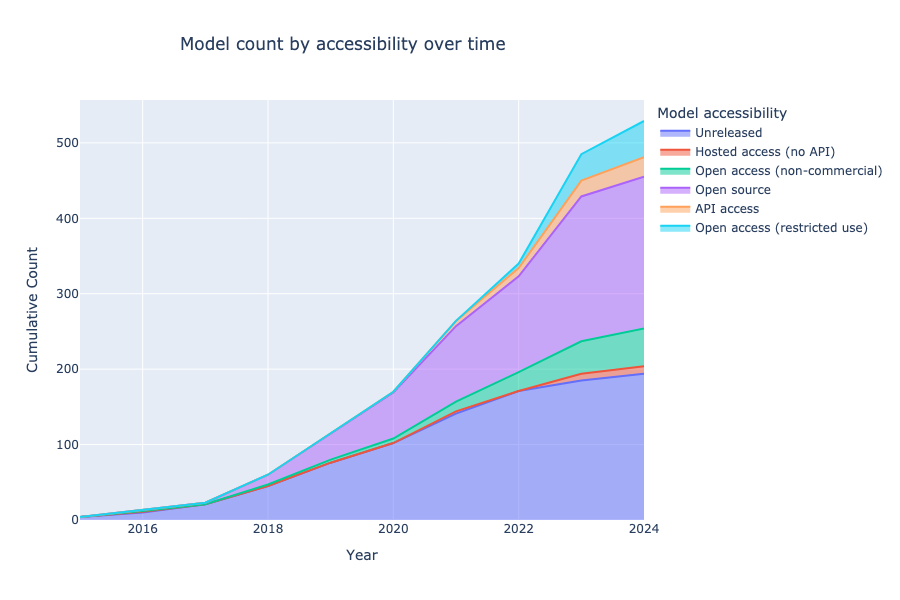

In [47]:
access_df['Year'] = pd.to_datetime(access_df['Publication date']).dt.year

# get counts of all models by year and model accessibility
access_counts = access_df.loc[access_df['Year'] >= 2015].groupby(['Year', 'Model accessibility']).size().reset_index(name='Count')

# add up cumulative counts by accessibility status for each year 
access_counts['Cumulative for status'] = access_counts.groupby('Model accessibility')['Count'].cumsum()

# cumulative area chart
fig = px.area(access_counts, x='Year', y='Cumulative for status', color='Model accessibility', line_group='Model accessibility',
              labels={'Cumulative for status': 'Cumulative Count', 'Year': 'Year'},
              title='Model count by accessibility over time')

fig.update_layout(
    autosize=False,
    width=900,
    height=600,
    title_x=0.2,
)

save_plot(fig, results_dir, f'cumulative_model_count_by_accessibility')

fig.show()

### Cumulative proportion plots

In [48]:
def normalize_counts(access_counts):
    # input -  model counts, grouped by accessibility and by year
    
    # df with total models per year, and cumulative totals
    total_counts = access_counts.groupby('Year')['Count'].sum().reset_index(name='Yearly Total')
    total_counts['Cumulative Total'] = total_counts['Yearly Total'].cumsum()
    
    # pivot the access counts table to get counts for every status and every year
    access_counts_wide = access_counts.pivot(index='Year', columns='Model accessibility', values='Cumulative for status')
    all_years = pd.Series(range(access_counts_wide.index.min(), access_counts_wide.index.max() + 1))

    # fill in the years where there are no models with a particular status
    access_counts_wide_filled = access_counts_wide.reindex(all_years).ffill().fillna(0)
    access_counts_wide_filled = access_counts_wide_filled.reset_index(names=["Year"])
    
    # unpivot
    access_counts_filled = (access_counts_wide_filled.melt(id_vars='Year', 
                                     var_name='Model accessibility', 
                                     value_name='Cumulative for status')
                               .reset_index(drop=True))
    
    # join with total counts df to get the cumulative totals
    normalized_counts = pd.merge(access_counts_filled, total_counts, on='Year')
    
    # divide annual counts by cumulative counts to find cumulative proportions by year
    normalized_counts['proportion'] = normalized_counts['Cumulative for status'] / normalized_counts['Cumulative Total']
    
    # sort using custom order
    custom_order = ['Unreleased', 'Hosted access (no API)', 'API access', 'Open access (non-commercial)', 'Open access (restricted use)', 'Open source']
    normalized_counts['Category_sorted'] = pd.Categorical(normalized_counts['Model accessibility'], categories=custom_order, ordered=True)
    normalized_counts = normalized_counts.sort_values('Category_sorted')
    
    return normalized_counts

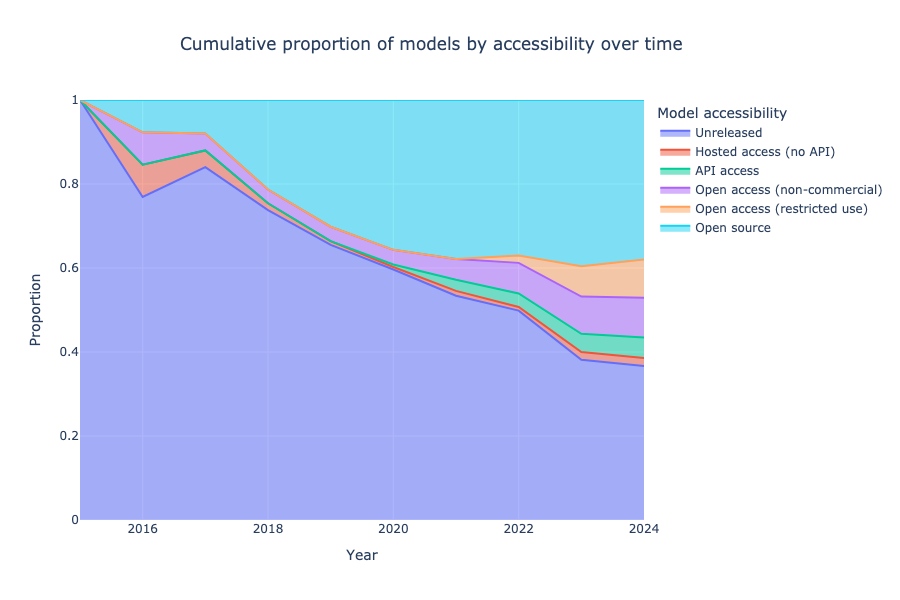

In [49]:
normalized_counts = normalize_counts(access_counts)

fig = px.area(normalized_counts, x='Year', y='proportion', color='Model accessibility', line_group='Model accessibility',
              labels={'proportion': 'Proportion', 'Year': 'Year'},
              title='Cumulative proportion of models by accessibility over time')

fig.update_yaxes(range=[0, 1])
fig.update_layout(
    autosize=False,
    width=900,
    height=600,
    title_x=0.2,
)

# save_plot(fig, results_dir, f'proportion_by_accessibility')
fig.show()

/var/folders/06/5htx0qw164j099bw2q7jk4gm0000gn/T/ipykernel_72057/4194927785.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



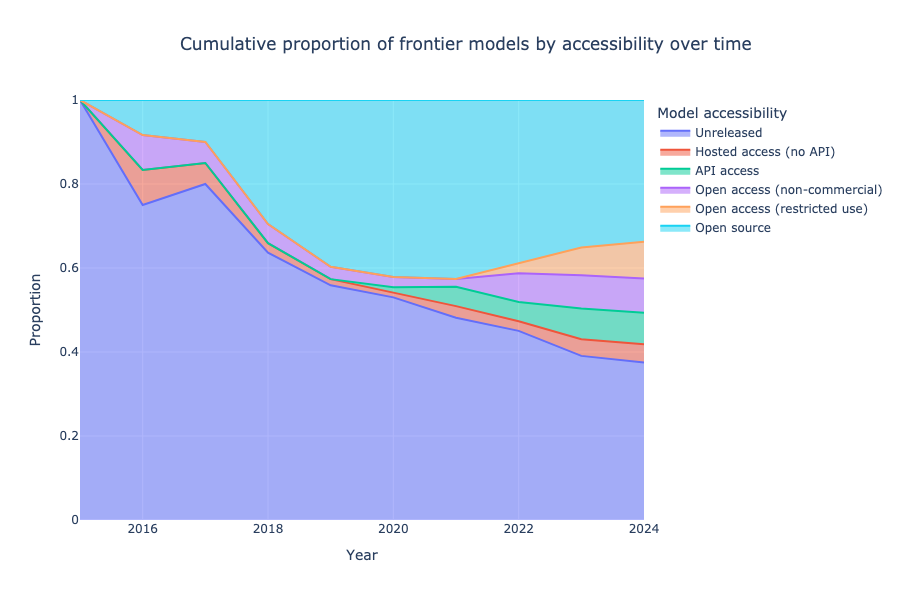

In [50]:
# repeat the above for frontier models

frontier_df['Year'] = pd.to_datetime(frontier_df['Publication date']).dt.year

# get counts of all models by year and model accessibility
frontier_access_counts = frontier_df.loc[access_df['Year'] >= 2015].groupby(['Year', 'Model accessibility']).size().reset_index(name='Count')

# add up cumulative counts by accessibility status for each year 
frontier_access_counts['Cumulative for status'] = frontier_access_counts.groupby('Model accessibility')['Count'].cumsum()


normalized_counts = normalize_counts(frontier_access_counts)

fig = px.area(normalized_counts, x='Year', y='proportion', color='Model accessibility', line_group='Model accessibility',
              labels={'proportion': 'Proportion', 'Year': 'Year'},
              title='Cumulative proportion of frontier models by accessibility over time')

fig.update_yaxes(range=[0, 1])
fig.update_layout(
    autosize=False,
    width=900,
    height=600,
    title_x=0.2,
)

# save_plot(fig, results_dir, f'proportion_by_accessibility')
fig.show()

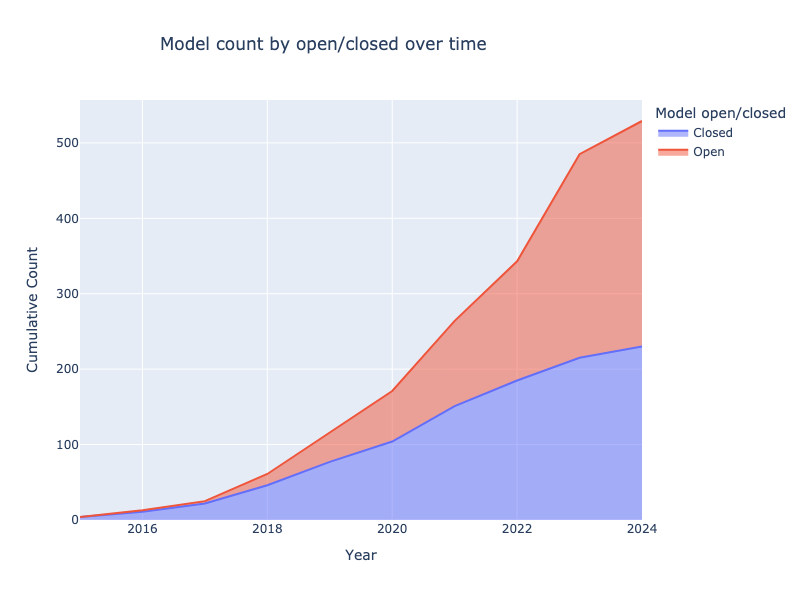

In [51]:
open_closed_df = access_df.loc[access_df['Year'] >= 2015].groupby(['Year', 'Model open/closed']).size().reset_index(name='Count')
open_closed_df['Cumulative for status'] = open_closed_df.groupby('Model open/closed')['Count'].cumsum()

fig = px.area(open_closed_df, x='Year', y='Cumulative for status', color='Model open/closed', line_group='Model open/closed',
              labels={'Cumulative for status': 'Cumulative Count', 'Year': 'Year'},
              title='Model count by open/closed over time')
fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    title_x=0.2,
)

save_plot(fig, results_dir, f'cumulative_model_count_by_open_closed')
fig.show()

In [52]:
total_counts = open_closed_df.groupby('Year')['Count'].sum().reset_index(name='Yearly Total')
total_counts['Cumulative Total'] = total_counts['Yearly Total'].cumsum()

open_counts = pd.merge(open_closed_df, total_counts, on='Year')
open_counts.head(5)

,Year,Model open/closed,Count,Cumulative for status,Yearly Total,Cumulative Total
0,2015,Closed,4,4,4,4
1,2016,Closed,7,11,9,13
2,2016,Open,2,2,9,13
3,2017,Closed,11,22,12,25
4,2017,Open,1,3,12,25


In [53]:
total_counts

,Year,Yearly Total,Cumulative Total
0,2015,4,4
1,2016,9,13
2,2017,12,25
3,2018,36,61
4,2019,55,116
5,2020,55,171
6,2021,93,264
7,2022,79,343
8,2023,142,485
9,2024,44,529


In [54]:
normalized_open = open_counts.copy()
# double check this code, am I missing a step?
normalized_open['proportion'] = open_counts['Cumulative for status'] / open_counts['Cumulative Total']
normalized_open.head(10)

,Year,Model open/closed,Count,Cumulative for status,Yearly Total,Cumulative Total,proportion
0,2015,Closed,4,4,4,4,1.000000
1,2016,Closed,7,11,9,13,0.846154
2,2016,Open,2,2,9,13,0.153846
3,2017,Closed,11,22,12,25,0.880000
4,2017,Open,1,3,12,25,0.120000
5,2018,Closed,24,46,36,61,0.754098
6,2018,Open,12,15,36,61,0.245902
7,2019,Closed,31,77,55,116,0.663793
8,2019,Open,24,39,55,116,0.336207
9,2020,Closed,27,104,55,171,0.608187


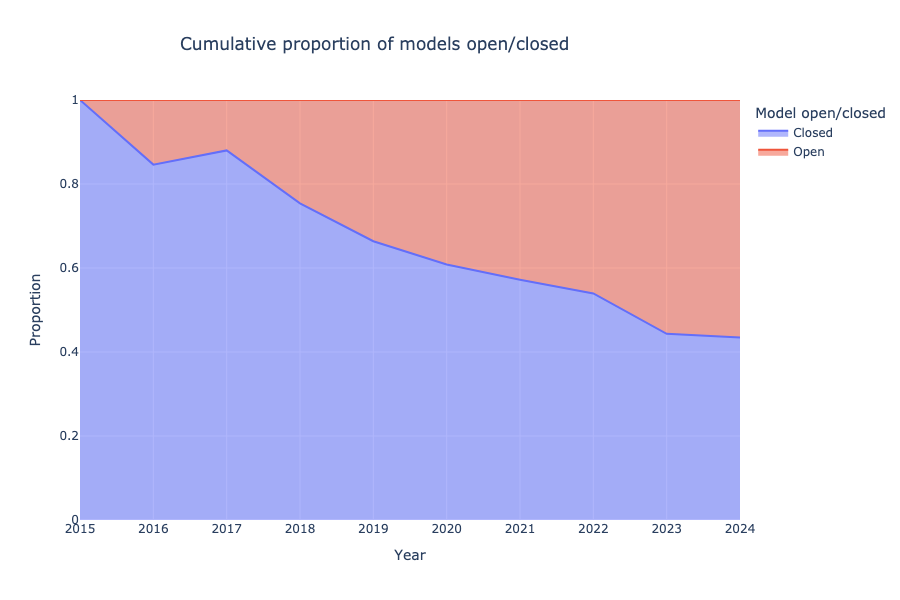

In [55]:
fig = px.area(normalized_open, x='Year', y='proportion', color='Model open/closed', line_group='Model open/closed',
              labels={'proportion': 'Proportion', 'Year': 'Year'},
              title='Cumulative proportion of models open/closed')

fig.update_yaxes(range=[0, 1])
fig.update_layout(
    autosize=False,
    width=900,
    height=600,
    title_x=0.2,
)
# Show the figure
fig.show()

# Regression Plots

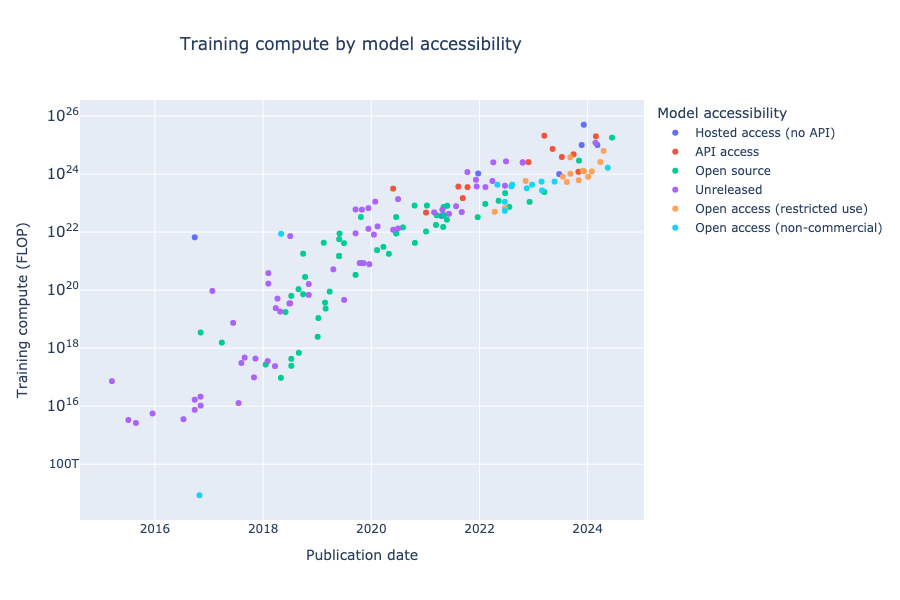

In [56]:
# filter out systems before start of analysis (2015)
access_df_recent = frontier_df[frontier_df['Publication date'] > pred_start_date]

fig = px.scatter(
    access_df_recent,
    x='Publication date',
    y='Training compute (FLOP)',
    color='Model accessibility',
    hover_data=['System'],
    log_y=True,
    title='Training compute by model accessibility'
)

# update size
fig.update_layout(
    autosize=False,
    width=900,
    height=600,
    title_x=0.2,
)

save_plot(fig, results_dir, f'training_compute_by_model_accessibility {start_year}')

fig.show()

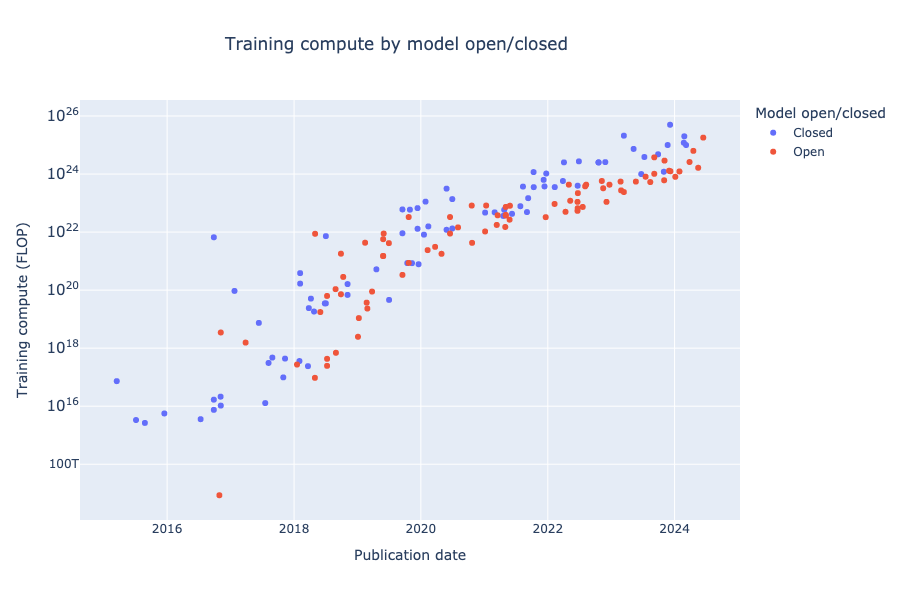

In [57]:
fig = px.scatter(
    # access_df,
    # access_df.loc[access_df_recent['System'].isin(selected_systems)],
    access_df_recent,
    x='Publication date',
    y='Training compute (FLOP)',
    color='Model open/closed',
    hover_data=['System'],
    log_y=True,
    title='Training compute by model open/closed'
)
# update size
fig.update_layout(
    autosize=False,
    width=900,
    height=600,
    title_x=0.25,
)

save_plot(fig, results_dir, f'training_compute_by_open_closed {start_year}')

fig.show()

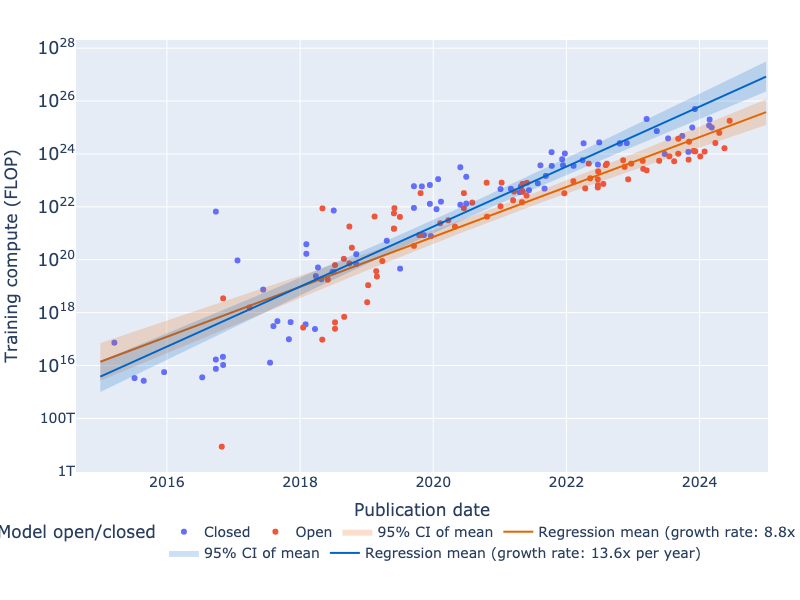

In [58]:
fig = px.scatter(
    # access_df,
    # access_df.loc[access_df['System'].isin(selected_systems)],
    access_df_recent,
    x='Publication date (float)',
    y='Training compute (FLOP)',
    color='Model open/closed',
    hover_data=['System'],
    log_y=True,
)

# Marker color
# fig.update_traces(
#     marker=dict(
#         color='rgb(0,100,200)',
#     ),
#     selector=dict(mode='markers'),
# )

# Shade in CI
fig.add_scatter(
    x=predicted_open_df['Publication date (float)'],
    y=10**predicted_open_df['mean_ci_lower'],
    mode='lines',
    line=dict(width=0),
    showlegend=False,
)
fig.add_scatter(
    x=predicted_open_df['Publication date (float)'],
    y=10**predicted_open_df['mean_ci_upper'],
    mode='lines',
    fill='tonexty',
    fillcolor='rgba(230,100,0,0.2)',
    line=dict(width=0),
    name='95% CI of mean',
)
fig.add_scatter(
    x=predicted_open_df['Publication date (float)'],
    y=10**predicted_open_df['mean'],
    mode='lines',
    line=dict(color='rgb(230,100,0)'),
    name=f'Regression mean (growth rate: {10**open_reg_results.params[1]:.1f}x per year)',
)

fig.add_scatter(
    x=predicted_closed_df['Publication date (float)'],
    y=10**predicted_closed_df['mean_ci_lower'],
    mode='lines',
    line=dict(width=0),
    showlegend=False,
)
fig.add_scatter(
    x=predicted_closed_df['Publication date (float)'],
    y=10**predicted_closed_df['mean_ci_upper'],
    mode='lines',
    fill='tonexty',
    fillcolor='rgba(0,100,200,0.2)',
    line=dict(width=0),
    name='95% CI of mean',
)
fig.add_scatter(
    x=predicted_closed_df['Publication date (float)'],
    y=10**predicted_closed_df['mean'],
    mode='lines',
    line=dict(color='rgb(0,100,200)'),
    name=f'Regression mean (growth rate: {10**closed_reg_results.params[1]:.1f}x per year)',
)

fig.update_traces(textposition='top center')

# legend on top
fig.update_layout(legend=dict(
    orientation='h',
    yanchor='top',
    y=-0.15,
    xanchor='center',
    x=0.5,
))

# axis labels
fig.update_xaxes(title_text='Publication date')

# title

# update size
fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    # title_x=0.2,
)

# font size
fig.update_layout(
    font=dict(
        size=14,
    )
)

# axis limits
fig.update_xaxes(range=[pred_start_date, pred_end_date])

# margins
fig.update_layout(margin=dict(l=10, r=10, t=40, b=10))

save_plot(fig, results_dir, f'open_closed_regression {start_year}')

fig.show()